In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.tail()

,label,review
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...
1999,pos,"a couple of months ago , when i first download..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
# Check for NaN values:
df.isnull().sum()

label      0
review    35
dtype: int64

In [8]:
#Let's just drop all the Nan values, as they are not many
df = df.dropna()

In [9]:
#Texts which are empty
df['review'].str.isspace().sum()

27

In [10]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [11]:
df = df[~df['review'].str.isspace()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [13]:
df.head(10)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [16]:
df.isna().sum()

label     0
review    0
dtype: int64

In [17]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

## Now our data is good, lets procees to training

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(stop_words='english')

In [20]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [21]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [22]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [24]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [25]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [26]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [27]:
preds = pipe.predict(X_test)

In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       188
         pos       0.87      0.87      0.87       200

    accuracy                           0.87       388
   macro avg       0.87      0.87      0.87       388
weighted avg       0.87      0.87      0.87       388



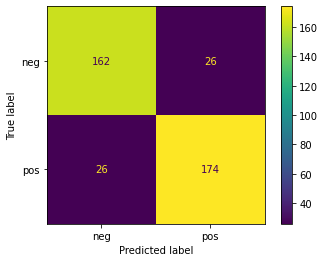

In [29]:
plot_confusion_matrix(pipe,X_test,y_test)

In [31]:
LinearSVC().accuracy(y_test,prdes)

AttributeError: 'LinearSVC' object has no attribute 'accuracy'